In [33]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])

In [ ]:
df_us= df[df['job_country'] == 'United States'].copy()
df_us["month"] = df_us["job_posted_date"].dt.strftime("%B")
top_roles = ["Data Analyst", "Data Scientist", "Data Engineer"]
df_us_filtered = df_us[df_us["job_title_short"].isin(top_roles)]
df_us_filtered_pivot = df_us_filtered.pivot_table(index='month',columns="job_title_short", aggfunc="size")

In [ ]:
df_us_filtered_pivot.reset_index(inplace=True)

In [36]:
df_us_filtered_pivot["month no"] = pd.to_datetime(df_us_filtered_pivot["month"] , format="%B").dt.month
df_us_filtered_pivot.sort_values(by=["month no"], inplace=True)
df_us_filtered_pivot.set_index("month", inplace=True)
df_us_filtered_pivot.drop(columns="month no", inplace=True)

df_us_filtered_pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist
month,,,
January,8494,2655,6915
February,6124,3060,4956
March,6218,3183,4779
April,6049,2801,4867
May,4993,2976,4377
June,5683,2893,4645
July,5201,2570,4876
August,6634,3269,6318
September,4639,3224,4568


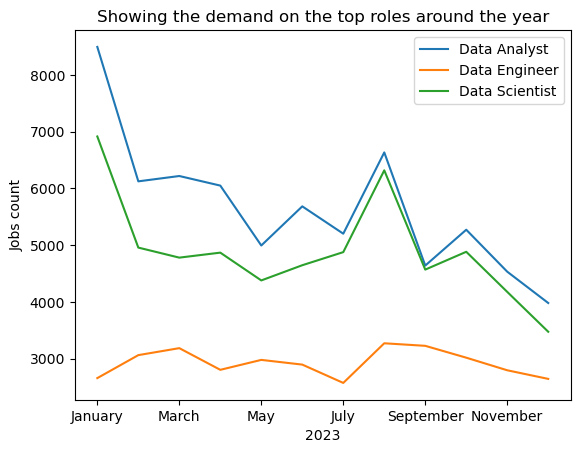

In [51]:
df_us_filtered_pivot.plot(kind="line")
plt.title("Showing the demand on the top roles around the year")
plt.ylabel("Jobs count")
plt.xlabel("2023")
plt.legend()
plt.show()